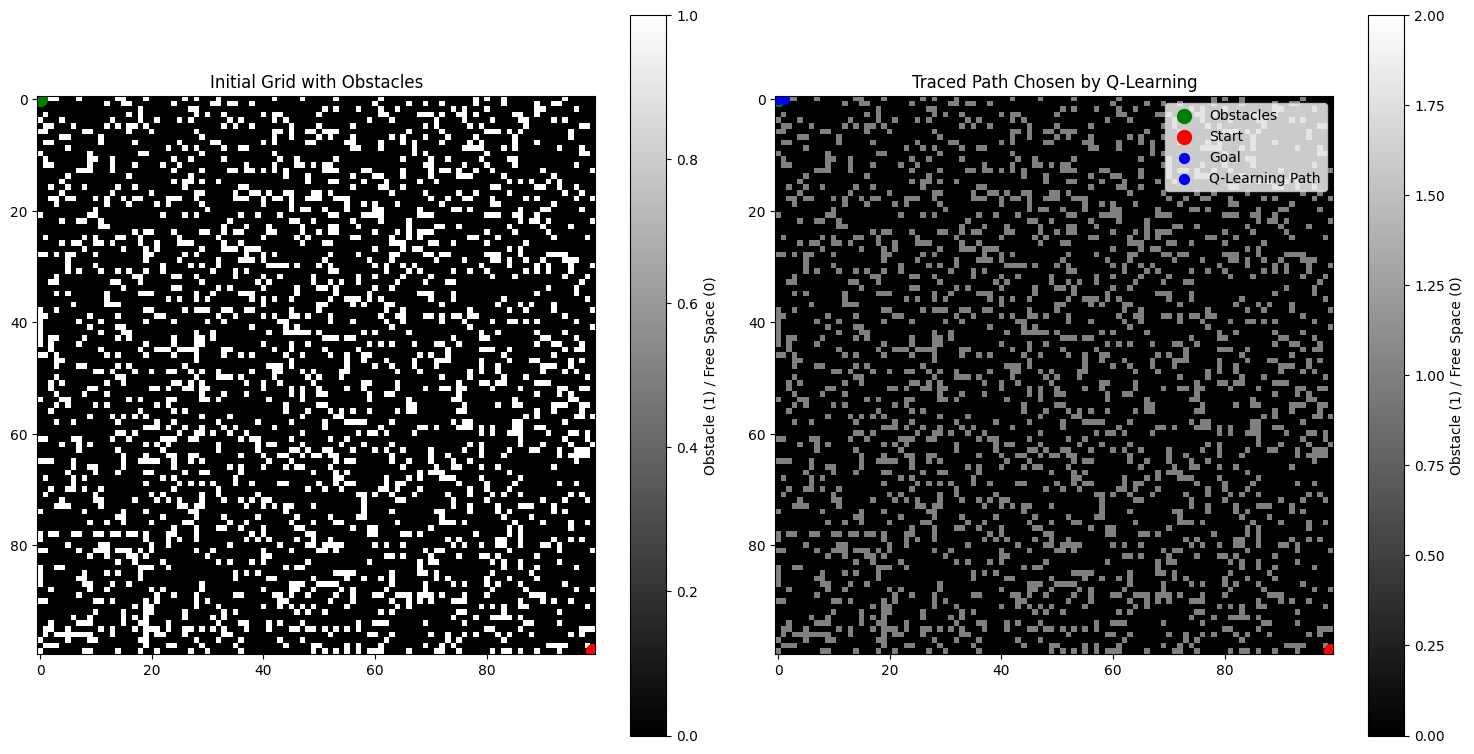

In [6]:
import numpy as np
import matplotlib.pyplot as plt

GRID_SIZE = 100
OBSTACLE_PROBABILITY = 0.2
DISCOUNT_FACTOR = 0.9
LEARNING_RATE = 0.1
NUM_EPISODES = 1000
EPSILON = 0.1

normal_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)] 
diagonal_directions = [(1, 1), (1, -1), (-1, -1), (-1, 1)]
all_directions = normal_directions + diagonal_directions

def generate_grid(size):
    grid = np.random.choice([0, 1], size=(size, size), p=[1 - OBSTACLE_PROBABILITY, OBSTACLE_PROBABILITY])
    return grid

def choose_action(state, q_table):
    if np.random.rand() < EPSILON:
        return np.random.randint(len(all_directions))
    else:
        return np.argmax(q_table[state])

def q_learning(grid):
    q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(all_directions)))
    
    for episode in range(NUM_EPISODES):
        start_x, start_y = np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE)
        state = (start_x, start_y)
        
        while True:
            action_index = choose_action(state, q_table)
            action = all_directions[action_index]
            next_state = (state[0] + action[0], state[1] + action[1])
            
            if (0 <= next_state[0] < GRID_SIZE) and (0 <= next_state[1] < GRID_SIZE) and (grid[next_state] == 0):
                reward = -1
            else:
                next_state = state
                reward = -1
            
            q_table[state][action_index] += LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(q_table[next_state]) - q_table[state][action_index])
            
            state = next_state
            
            if state == (GRID_SIZE - 1, GRID_SIZE - 1):
                break
    
    return q_table

def find_best_policy_from_q_table(q_table):
    best_policy = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if q_table[x][y].sum() > 0:
                best_action_index = np.argmax(q_table[x][y])
                best_policy[x][y] = best_action_index
    
    return best_policy

def trace_back_path_from_q_table(best_policy_indices, start_position, goal_position):
    path = []
    current_position = start_position
    
    while current_position != goal_position:
        path.append(current_position)
        action_index = best_policy_indices[current_position]
        action = all_directions[action_index]
        next_position = (current_position[0] + action[0], current_position[1] + action[1])
        
        if not (0 <= next_position[0] < GRID_SIZE) or not (0 <= next_position[1] < GRID_SIZE) or grid[next_position] == 1:
            break
        
        current_position = next_position
    
    path.append(goal_position) if current_position == goal_position else None
    
    return path

grid = generate_grid(GRID_SIZE)
q_table = q_learning(grid)

best_policy_indices = find_best_policy_from_q_table(q_table)

start_position = (0, 0)
goal_position = (GRID_SIZE - 1, GRID_SIZE - 1)

optimal_path_q_learning = trace_back_path_from_q_table(best_policy_indices, start_position, goal_position)

## GPT CODE FOR PLOTTING

# Display initial grid with start and goal positions marked
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(grid, cmap='gray')
plt.title('Initial Grid with Obstacles')
plt.colorbar(label='Obstacle (1) / Free Space (0)')
plt.scatter(*start_position[::-1], color='green', label='Start', s=100)
plt.scatter(*goal_position[::-1], color='red', label='Goal', s=100)

# Display final grid with optimal actions indicated by colors and paths traced back
final_grid_with_best_policy_and_path_q_learning = np.copy(grid)

# Marking the traced paths with different colors based on which policy was chosen.
for pos in optimal_path_q_learning:
    final_grid_with_best_policy_and_path_q_learning[pos] = 2

plt.subplot(2, 2, 2)
plt.imshow(final_grid_with_best_policy_and_path_q_learning.astype(float), cmap='gray')
plt.title('Traced Path Chosen by Q-Learning')
plt.colorbar(label='Obstacle (1) / Free Space (0)')
plt.scatter(*start_position[::-1], color='green', label='Start', s=100)
plt.scatter(*goal_position[::-1], color='red', label='Goal', s=100)

# Overlaying paths with distinct colors on top of the grid visualization.
for pos in optimal_path_q_learning:
    plt.scatter(pos[1], pos[0], color='blue', s=50)

plt.legend(['Obstacles', 'Start', 'Goal', 'Q-Learning Path'])

plt.tight_layout()
plt.show()